In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('changingjob_train.csv')

In [3]:
data.head()

,Unnamed: 0,Unnamed: 0.1,city,city_development_Index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0,0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,30,NaN,Other,1,36,1
1,1,1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,3.0,Pvt Ltd,>4,47,0
2,2,2,city_21,0.624,Other,No relevent experience,Full time course,Graduate,STEM,5,NaN,Other,never,83,0
3,3,3,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,30,3.0,Funded Startup,4,8,0
4,4,4,city_176,0.764,Other,Has relevent experience,Part time course,Graduate,STEM,11,NaN,Other,1,24,1


In [4]:
data = data.iloc[:,2:]

In [5]:
data.isnull().sum()

city                         0
city_development_Index       0
gender                       0
relevent_experience          0
enrolled_university          0
education_level              0
major_discipline          2572
experience                   0
company_size              5497
company_type                 0
last_new_job                 0
training_hours               0
target                       0
dtype: int64

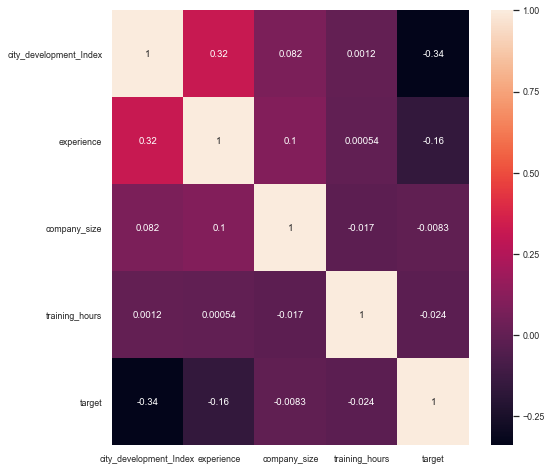

In [6]:
#상관관계 분석

plt.figure(figsize=(8,8))
sns.set(font_scale=0.8)
sns.heatmap(data.corr(), annot=True, cbar=True)
plt.show()

#target열과 상관 계수가 높은 피처 city_development_Index열(-0.34) 
#city_development와 experience 상관계수는 0.32로 양의 상관관계가 있다.

In [7]:
data['target'].value_counts()

#0: 이직 X / 1: 이직

0    13639
1     4487
Name: target, dtype: int64

In [8]:
#1. city

len(data['city'].unique())
#unique 값 너무 많으므로 drop, 중요한 지표라고 생각되지 않음

123

In [9]:
data.drop(['city'], axis=1, inplace=True)

In [10]:
#2. city_development_Index

data['city_development_Index'].describe()

count    18126.000000
mean         0.829833
std          0.122993
min          0.448000
25%          0.743000
50%          0.910000
75%          0.920000
max          0.949000
Name: city_development_Index, dtype: float64

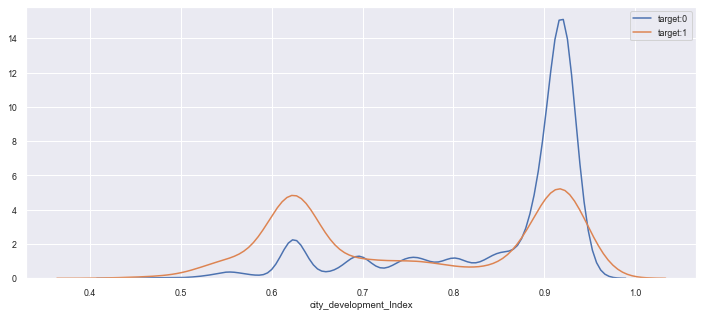

In [11]:
plt.figure(figsize=(12,5))
sns.distplot(data[data.target==0]['city_development_Index'], hist=False, label='target:0')
sns.distplot(data[data.target==1]['city_development_Index'], hist=False, label='target:1')
plt.show()
#선진국일수록 job덜 바꿈

In [12]:
#3. Gender - LabelEncoding 필요

data['gender'].unique()

array(['Male', 'Other', 'Female'], dtype=object)

In [13]:
data['gender'].value_counts()

Male      12594
Other      4352
Female     1180
Name: gender, dtype: int64

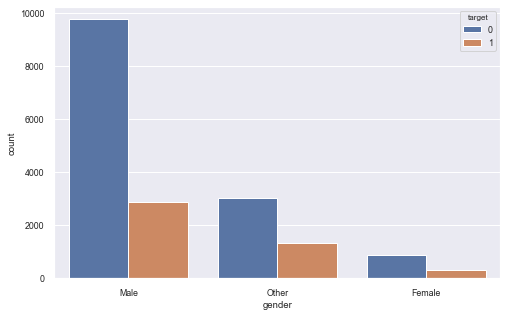

In [14]:
plt.figure(figsize=(8,5))
sns.countplot(x='gender', data=data, hue='target')

#other(기타) -> Male이 Female보다 많으므로 Male로 변환

In [15]:
data['gender'] = data['gender'].map({'Other':'Male', 'Male':'Male', 'Female':'Female'})

In [16]:
#4. relevent_experience - LabelEncoding 필요

data['relevent_experience'].unique()

array(['Has relevent experience', 'No relevent experience'], dtype=object)

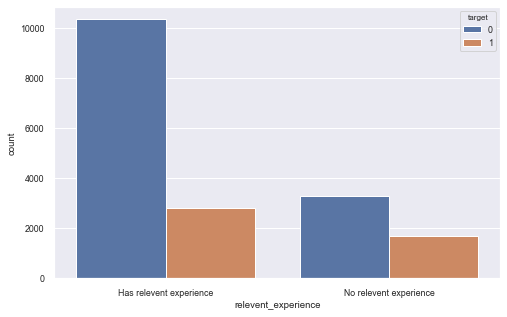

In [17]:
plt.figure(figsize=(8,5))
sns.countplot(x='relevent_experience', data=data, hue='target')

In [18]:
#5. enrolled_university - LabelEncoding 필요

data['enrolled_university'].unique()

array(['no_enrollment', 'Full time course', 'Part time course'],
      dtype=object)

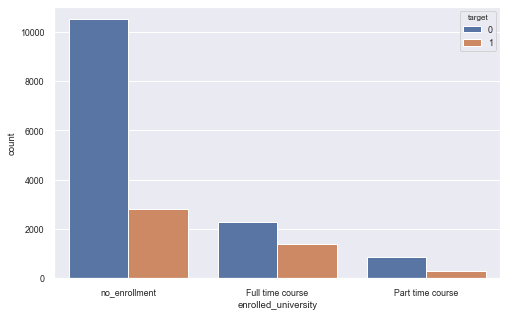

In [19]:
plt.figure(figsize=(8,5))
sns.countplot(x='enrolled_university', data=data, hue='target')

In [20]:
#6. education_level - LabelEncoding

data['education_level'].value_counts()

Graduate    10962
Masters      4189
UH           2572
Phd           403
Name: education_level, dtype: int64

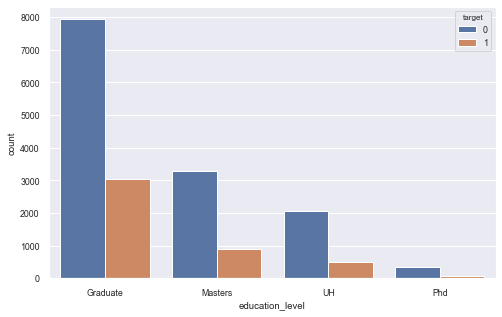

In [21]:
plt.figure(figsize=(8,5))
sns.countplot(x='education_level', data=data, hue='target')

In [22]:
#7. major_discipline - LabelEncoding 필요

data['major_discipline'].value_counts(dropna=False)

STEM               13980
NaN                 2572
Humanities           650
Other                369
Business Degree      314
Arts                 241
Name: major_discipline, dtype: int64

In [23]:
data['major_discipline'].fillna('UH', inplace=True)

#성윤님꺼 참고 - 결측값 개수가 education_level의 UH 개수와 같음 
#전공 결측값 = 고졸을 의미한다는 것을 알 수 있다. 

In [24]:
#8. experience 

data['experience'].unique()

array([30, 15,  5, 11, 13,  7, 17,  2, 16,  1,  4, 10,  0, 14, 18, 19, 12,
        3,  6,  9,  8, 20, 21], dtype=int64)

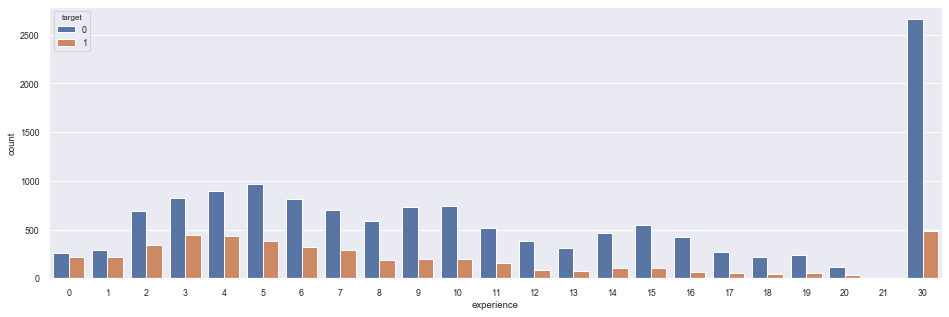

In [25]:
plt.figure(figsize=(16, 5))
sns.countplot(x='experience',hue="target",data=data)

In [26]:
def year(x):
    if x['experience'] <= 5:
        return 1
    elif x['experience'] > 5  and x['experience'] <= 10:
        return 2
    elif x['experience'] > 10 and x['experience'] <= 15:
        return 3
    elif x['experience'] > 15 and x['experience'] <= 20:
        return 4
    elif x['experience'] > 20 and x['experience'] <= 25:
        return 5
    elif x['experience'] > 25 and x['experience'] <= 30:
        return 6

data['exp_count'] = data.apply(year, axis=1)

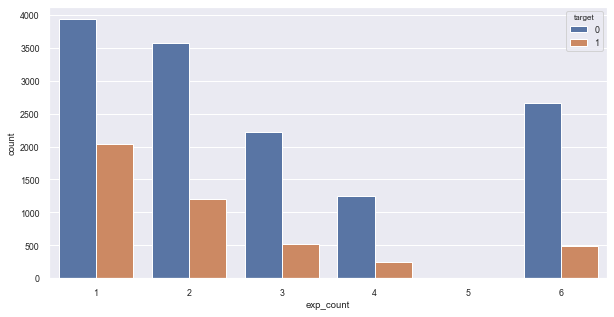

In [27]:
plt.figure(figsize=(10,5))
sns.countplot(x='exp_count', hue='target', data=data)

#경험기간이 길수록 이직률 줄어듦. 

In [28]:
data['experience'] = data['exp_count']
data.drop(['exp_count'], axis=1, inplace=True)

In [29]:
data['company_size'].value_counts(dropna=False)

NaN    5497
3.0    2934
4.0    2465
8.0    1941
2.0    1405
6.0    1264
1.0    1245
5.0     837
7.0     538
Name: company_size, dtype: int64

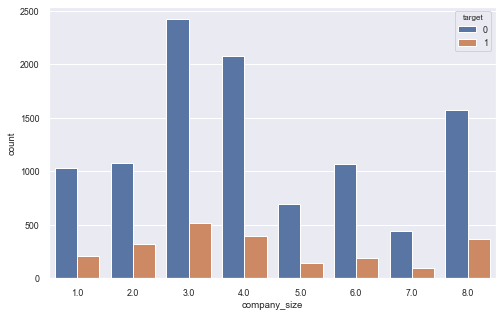

In [30]:
plt.figure(figsize=(8,5))
sns.countplot(x='company_size', hue='target', data=data)

#결측값도 많고, 특징 보이지 않으므로 drop

In [31]:
data.drop(['company_size'], axis=1, inplace=True)

In [32]:
#10. company_type - LabelEncoding 필요

data['company_type'].unique()

array(['Other', 'Pvt Ltd', 'Funded Startup', 'Early Stage Startup',
       'Public Sector', 'NGO'], dtype=object)

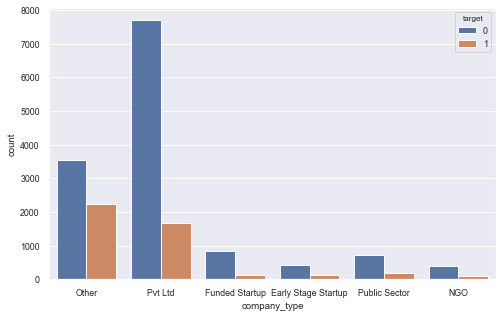

In [33]:
plt.figure(figsize=(8,5))
sns.countplot(x='company_type', hue='target', data=data)

In [34]:
#11. last_new_job - LabelEncoding 필요

data['last_new_job'].unique()

array(['1', '>4', 'never', '4', '3', '2', '0'], dtype=object)

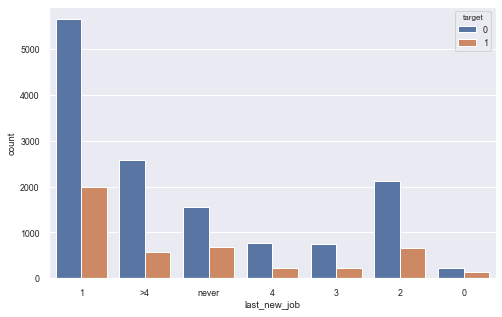

In [35]:
plt.figure(figsize=(8,5))
sns.countplot(x='last_new_job', hue='target', data=data)

In [36]:
#12. training_hours 

len(data['training_hours'].unique())

241

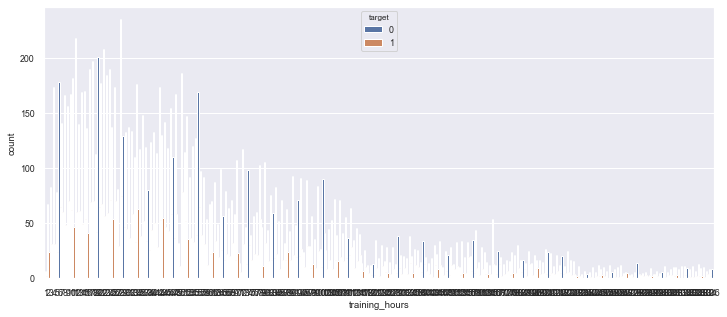

In [37]:
plt.figure(figsize=(12,5))
sns.countplot(x='training_hours', hue='target', data=data)

#training_hours가 적을수록 이직률 낮음

In [38]:
#레이블 인코딩

from sklearn.preprocessing import LabelEncoder

col_lb = ['gender','relevent_experience','enrolled_university','education_level','major_discipline','company_type','last_new_job']

def encoding(li):
    for col in li:
        encoder = LabelEncoder()
        data[col] = encoder.fit_transform(data[col])
        print(col)
        for i, j in enumerate(encoder.classes_):
            print(j, '->', i)
        print('')
        
encoding(col_lb)

gender
Female -> 0
Male -> 1

relevent_experience
Has relevent experience -> 0
No relevent experience -> 1

enrolled_university
Full time course -> 0
Part time course -> 1
no_enrollment -> 2

education_level
Graduate -> 0
Masters -> 1
Phd -> 2
UH -> 3

major_discipline
Arts -> 0
Business Degree -> 1
Humanities -> 2
Other -> 3
STEM -> 4
UH -> 5

company_type
Early Stage Startup -> 0
Funded Startup -> 1
NGO -> 2
Other -> 3
Public Sector -> 4
Pvt Ltd -> 5

last_new_job
0 -> 0
1 -> 1
2 -> 2
3 -> 3
4 -> 4
>4 -> 5
never -> 6



In [39]:
data.head()

,city_development_Index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,last_new_job,training_hours,target
0,0.920,1,0,2,0,4,6,3,1,36,1
1,0.776,1,1,2,0,4,3,5,5,47,0
2,0.624,1,1,0,0,4,1,3,6,83,0
3,0.767,1,0,2,1,4,6,1,4,8,0
4,0.764,1,0,1,0,4,3,3,1,24,1


In [40]:
#피처 스케일링

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data.loc[:,:'training_hours'] = scaler.fit_transform(data.loc[:,:'training_hours'])

data.head()

,city_development_Index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,last_new_job,training_hours,target
0,0.942116,1.0,0.0,1.0,0.000000,0.8,1.0,0.6,0.166667,0.104478,1
1,0.654691,1.0,1.0,1.0,0.000000,0.8,0.4,1.0,0.833333,0.137313,0
2,0.351297,1.0,1.0,0.0,0.000000,0.8,0.0,0.6,1.000000,0.244776,0
3,0.636727,1.0,0.0,1.0,0.333333,0.8,1.0,0.2,0.666667,0.020896,0
4,0.630739,1.0,0.0,0.5,0.000000,0.8,0.4,0.6,0.166667,0.068657,1


In [41]:
from sklearn.model_selection import train_test_split

X_data = data.iloc[:,:-1]
y_data = data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.3, random_state=42)

Text(0.5, 0, 'Random Forest Feature Importance')

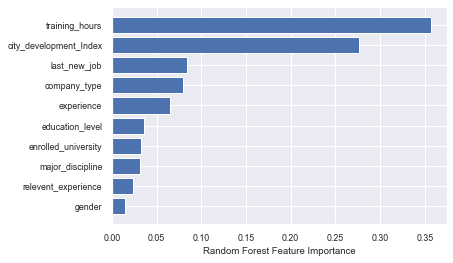

In [42]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=0)
rf.fit(X_train, y_train)
sorted_idx = rf.feature_importances_.argsort()
plt.barh(data.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [43]:
X_train = X_train[['training_hours','city_development_Index','last_new_job','company_type','experience','education_level']]
X_test = X_test[['training_hours','city_development_Index','last_new_job','company_type','experience','education_level']]

In [44]:
#KNN

from sklearn import neighbors

knn = neighbors.KNeighborsClassifier()
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)

In [45]:
#SVM

from sklearn.svm import SVC

svm_l = SVC(kernel='linear')
svm_l.fit(X_train, y_train)
pred_svm_l = svm_l.predict(X_test)

svm_r = SVC(kernel = 'rbf')
svm_r.fit(X_train, y_train)
pred_svm_r = svm_r.predict(X_test)

In [46]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)

In [47]:
#정확도 측정

from sklearn.metrics import accuracy_score

ac_knn = accuracy_score(y_test, pred_knn)
ac_svm_l = accuracy_score(y_test, pred_svm_l)
ac_svm_r = accuracy_score(y_test, pred_svm_r)
ac_lr = accuracy_score(y_test, pred_lr)

print(ac_knn, ac_svm_l, ac_svm_r, ac_lr)

#SVM(비선형)의 정확도 제일 높게 나오므로 SVM GridSearchCV 실행

0.7546892239794042 0.7583670467083486 0.7798823096726738 0.7765722692166238


In [48]:
#GridSearchCV 

from sklearn.model_selection import GridSearchCV

In [49]:
#SVM(비선형) - GridSearch

param_grid = {'C': [10, 100, 150],
             'gamma': [0,1, 1, 2]}

grid_svm_r = GridSearchCV(svm_r, param_grid, cv=5, refit=True)
grid_svm_r.fit(X_train, y_train)
print(grid_svm_r.best_params_)

{'C': 150, 'gamma': 1}


In [50]:
grid_pred_svm = grid_svm_r.predict(X_test)
print(accuracy_score(y_test, grid_pred_svm))

0.78411180581096


여기까지가 train_data를 통한 모델 학습 

test data의 target 예측하기

In [51]:
test =  pd.read_csv('changingjob_testx.csv')

In [52]:
test.head()

,Unnamed: 0,Unnamed: 0.1,city,city_development_Index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,0,18126,city_128,0.527,Other,Has relevent experience,no_enrollment,Graduate,STEM,4,3.0,Pvt Ltd,4,36
1,1,18127,city_114,0.926,Other,Has relevent experience,no_enrollment,Graduate,STEM,16,4.0,Pvt Ltd,>4,8
2,2,18128,city_114,0.926,Male,Has relevent experience,no_enrollment,Graduate,STEM,12,8.0,Pvt Ltd,4,35
3,3,18129,city_67,0.855,Male,Has relevent experience,no_enrollment,Graduate,STEM,0,NaN,Other,1,41
4,4,18130,city_100,0.887,Male,Has relevent experience,no_enrollment,Graduate,STEM,2,5.0,Pvt Ltd,2,17


In [53]:
test = test.iloc[:,2:]

In [54]:
test.drop(['city'], axis=1, inplace=True)
test['gender'] = test['gender'].map({'Other':'Male', 'Male':'Male', 'Female':'Female'})
test['major_discipline'].fillna('UH', inplace=True)
test['exp_count'] = test.apply(year, axis=1)
test['experience'] = test['exp_count']
test.drop(['exp_count'], axis=1, inplace=True)
test.drop(['company_size'], axis=1, inplace=True)

In [55]:
#레이블 인코딩

col_lb = ['gender','relevent_experience','enrolled_university','education_level','major_discipline','company_type','last_new_job']

def encoding(li):
    for col in li:
        encoder = LabelEncoder()
        test[col] = encoder.fit_transform(test[col])
        
encoding(col_lb)

In [56]:
#피처 스케일링

test.loc[:,:'training_hours'] = scaler.transform(test.loc[:,:'training_hours'])

test.head()

,city_development_Index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,last_new_job,training_hours
0,0.157685,1.0,0.0,1.0,0.0,0.8,0.0,1.0,0.666667,0.104478
1,0.954092,1.0,0.0,1.0,0.0,0.8,0.6,1.0,0.833333,0.020896
2,0.954092,1.0,0.0,1.0,0.0,0.8,0.4,1.0,0.666667,0.101493
3,0.812375,1.0,0.0,1.0,0.0,0.8,0.0,0.6,0.166667,0.119403
4,0.876248,1.0,0.0,1.0,0.0,0.8,0.0,1.0,0.333333,0.047761


In [57]:
test = test[['training_hours','city_development_Index','last_new_job','company_type','experience','education_level']]

In [58]:
y_test_pred = grid_svm_r.predict(test)

In [60]:
y_pred = pd.DataFrame(y_test_pred)
y_pred.columns =['target']
y_pred['index'] = y_pred.index
y_pred = y_pred[['index', 'target']]

y_pred.to_csv("kaggle.csv", header=True, index=False)